# Test Plots zum Verstaendnis


In [1]:
import genetic_algorithm as ga 
import scipy.signal as sig
import matplotlib.pyplot as plot
import matplotlib.gridspec as gridspec
import math


ORDER = 10


ModuleNotFoundError: No module named 'genetic_algorithm'

[-418.46 -726.07  600.59]
[ 0.01072958 -0.07817567  0.36998581]


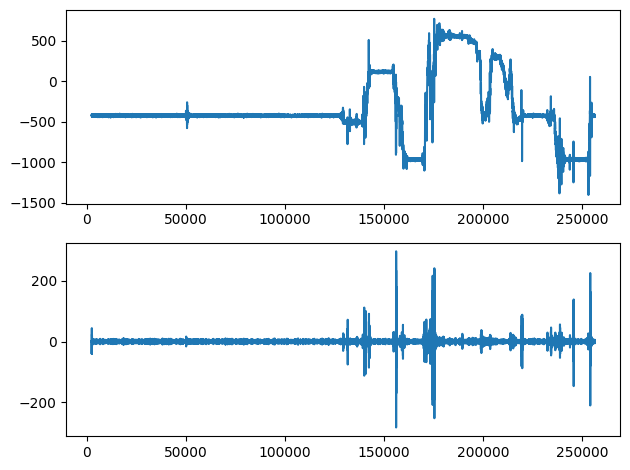

In [ ]:


raw_measurements = ga.get_measurements('../../Datalogs/IMU_0.txt') # Format of Raw Measurements is that as in the datalogs

print(raw_measurements[1, 1:4])
    #dp.plot_measurements_out_of_data(raw_measurements)

# Low and Highfilter of the Accelerometer
lowpass_filter_acc = sig.butter(ORDER, 15.0, btype="lowpass", output="sos", fs=100.0)
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

time = raw_measurements[:, 0]
acc_x = raw_measurements[:,1]

filtered_acc_x = sig.sosfilt(highpass_filter_acc, acc_x) # ACC_X
print(filtered_acc_x[1:4])

# Plot Raw Measurement and Original Data
fig = plot.figure(tight_layout=True)
gs = gridspec.GridSpec(2,1)
ax = fig.add_subplot(gs[0,0])
ax.plot(time, acc_x)
ax = fig.add_subplot(gs[1,0])
ax.plot(time, filtered_acc_x)
plot.show()



[ 1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17. 18.
 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35. 36.
 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53. 54.
 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71. 72.
 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89. 90.
 91. 92. 93. 94. 95. 96. 97. 98. 99.]
28298
(28298,)
100


c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\Users\veigh\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


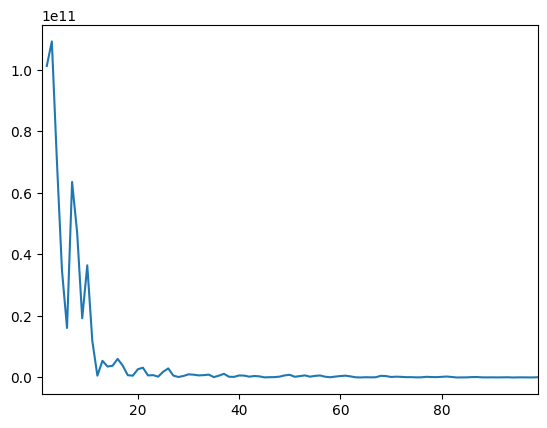

In [ ]:
import scipy.fft as fft
import numpy as np

dt = 0.01 # sample intervall

sample_rate = 1/dt

acc_x_fft = fft.fft(acc_x)
power_spectrum_density = acc_x_fft * np.conj(acc_x_fft) / sample_rate

frequencies = np.arange(1, sample_rate)
print(frequencies)

print(len(power_spectrum_density))
print(np.shape(power_spectrum_density))
psd = power_spectrum_density[:100]

print(len(psd))

k = np.arange(1,99,dtype='int')

fig, ax = plot.subplots()
plot.plot(frequencies[k], psd[k])
plot.xlim(frequencies[0], frequencies[-1])
plot.show()


In [ ]:
highpass_filter_acc = sig.butter(ORDER, 40.0, btype="highpass", output="sos", fs=100.0)

a_k = np.array([-418.46, -726.07 , 600.59])

print(np.linalg.norm(a_k))
hpf_a_k = np.array([0.01072958 ,-0.07817567 , 0.36998581])
print(np.linalg.norm(hpf_a_k))

low_a_k = sig.sosfilt(lowpass_filter_acc, hpf_a_k)
print(low_a_k)
print(np.linalg.norm(low_a_k))

1031.0163745547402
0.3783068316436824
[5.32332147e-07 3.56750853e-06 1.34426247e-05]
1.391814118652343e-05


In [ ]:
lowpass_filter_mag = sig.butter(ORDER, 15, btype="lowpass", output="sos", fs=100)
highpass_filter_mag = sig.butter(ORDER, 45, btype="highpass", output="sos", fs=100)

mag_measurements = raw_measurements[:, 7:10]
print(mag_measurements)

hpf_mag = sig.sosfilt(highpass_filter_mag, mag_measurements)
print(hpf_mag[0])
print(np.linalg.norm(hpf_mag[0]))

low_mag = sig.sosfilt(lowpass_filter_mag, hpf_mag)
print(low_mag[0])
print(np.linalg.norm(low_mag))

[[-16.95 -18.45  90.9 ]
 [-16.5  -17.85  92.1 ]
 [-16.2  -17.7   92.7 ]
 ...
 [ -8.85  -5.25  99.6 ]
 [ -8.85  -5.25  99.6 ]
 [ -8.25  -6.6   99.  ]]
[-6.13538316e-08  1.03711296e-06 -8.27909897e-06]
8.344030637549836e-06
[-3.04397906e-12  8.87668956e-12  2.68503057e-11]
4.937641619488169e-09


In [ ]:
lowpass_filter_gyro = sig.butter(ORDER,10, btype="lowpass", output="sos", fs=100)

gyro_meas = raw_measurements[:, 4:7]
print(gyro_meas)

low_gyro = sig.sosfilt(lowpass_filter_gyro, gyro_meas)
print(low_gyro[0])
print(np.linalg.norm(low_gyro[0]))

[[-1.03  1.24  0.5 ]
 [-0.05  1.18 -0.18]
 [ 1.56  0.26  2.43]
 ...
 [ 0.23 -1.41  1.89]
 [-0.69 -0.76  2.86]
 [-1.44  0.02  0.21]]
[-1.73408885e-06 -2.56362600e-05 -1.80904138e-04]
0.00018271981822567685


In [ ]:
arr = np.array([[1,2], [3, 4],[5,6],[7,8]])

list = [[1,2], [3,4], [5,6] ,[7,52]]

list_array = np.array([_ for _ in list if _ !=[5,6]])
print(list_array)

[[ 1  2]
 [ 3  4]
 [ 7 52]]


In [13]:
from scipy.optimize import least_squares

placeholder = 0

def function(a, *args):
    c , _ = args
    return a+placeholder+c

def main(): 
  placeholder = 20
  c = 19
  result= least_squares(function, 5, args=(c, []))

  print(result["x"])

if __name__ == "__main__":
    main()


[-19.]


In [33]:
import numpy as np
sample_rate = 100
time_begin = 1 # begin time in s
time_end = 225 # end time in s
sample_time = 1/sample_rate

num_elements = int((time_end - time_begin) / sample_time) + 1



times = [[time for time in np.linspace(start=time_begin,stop=time_end,num=num_elements)]]

print(times)


[[1.0, 1.0099559980443575, 1.019911996088715, 1.0298679941330726, 1.0398239921774302, 1.0497799902217877, 1.0597359882661452, 1.0696919863105028, 1.0796479843548603, 1.0896039823992179, 1.0995599804435752, 1.1095159784879327, 1.1194719765322902, 1.1294279745766478, 1.1393839726210053, 1.1493399706653629, 1.1592959687097204, 1.169251966754078, 1.1792079647984355, 1.189163962842793, 1.1991199608871506, 1.209075958931508, 1.2190319569758656, 1.2289879550202232, 1.2389439530645807, 1.2488999511089383, 1.2588559491532956, 1.2688119471976531, 1.2787679452420107, 1.2887239432863682, 1.2986799413307257, 1.3086359393750833, 1.3185919374194408, 1.3285479354637983, 1.3385039335081559, 1.3484599315525134, 1.358415929596871, 1.3683719276412285, 1.378327925685586, 1.3882839237299436, 1.3982399217743011, 1.4081959198186587, 1.4181519178630162, 1.4281079159073737, 1.4380639139517313, 1.4480199119960888, 1.4579759100404464, 1.467931908084804, 1.4778879061291614, 1.4878439041735187, 1.4977999022178763, 

In [42]:
time = np.array([1, 2, 3,4])
meas = np.array([1,345,53254,4])

def get_shape(data):
    print(np.shape(data))
    print(data[0:4+1])

get_shape(meas.T)


(4,)
[    1   345 53254     4]
